In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import random
import warnings
from itertools import product

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython import display
from tqdm.notebook import tqdm
from sklearn.exceptions import ConvergenceWarning

try:
    from myst_nb import glue
except ImportError:
    glue = lambda *args, **kwargs: _
# 一部の警告を無視
warnings.simplefilter("ignore", ConvergenceWarning)
warnings.simplefilter("ignore", FutureWarning)
os.environ["PYTHONWARNINGS"] = "ignore"

In [81]:
# 白地のまま学習する

# 画像を読み込む
try:
    train
except:
    train=1
pixel=60
N,M=50,50
K=10
Xs=[]
Ys=[]
data_name='numbers_line'
for i in range(K):
    img=cv2.imread(f'./training_data/{data_name}/numbers_{i}.png')
    numbers=np.load(f'./training_data/{data_name}/numbers_{i}.npy')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # 処理が完了した画像を保存するなどの操作を行うことができます
    # plt.imshow(img, cmap='gray')
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # plt.imshow(img, cmap='gray')
    # print(img.shape)
    img_rs=cv2.resize(gray,(pixel*M,pixel*N),interpolation=cv2.INTER_AREA)
    # img_rs=cv2.bitwise_not(img_rs)
    print(img_rs.shape,i)

    for i in range(N):
        for j in range(M):
            digit_square = img_rs[i*pixel:(i+1)*pixel, j*pixel:(j+1)*pixel]
            x_i=digit_square.reshape(1, -1)
            # print(x_i.shape,i,j)
            y=numbers[i,j]
            Xs.append(x_i)
            Ys.append(y)
        
Xs=pd.DataFrame(np.array(Xs).reshape(N*M*K,-1))
Ys=pd.DataFrame(np.array(Ys).reshape(N*M*K,-1),columns=['label'])
print(Xs.shape,Ys.shape)
df=pd.concat([Ys,Xs],axis=1)
# df=df.loc[df.iloc[:,0]!=0]
df.shape
# train=0
# train


(3000, 3000) 0
(3000, 3000) 1
(3000, 3000) 2
(3000, 3000) 3
(3000, 3000) 4
(3000, 3000) 5
(3000, 3000) 6
(3000, 3000) 7
(3000, 3000) 8
(3000, 3000) 9
(25000, 3600) (25000, 1)


(25000, 3601)

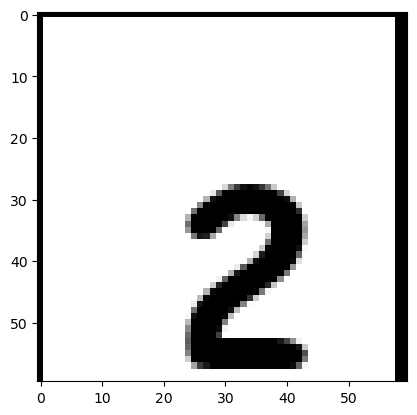

In [82]:
i,j=10,5
plt.imshow(img_rs[i*pixel:(i+1)*pixel, j*pixel:(j+1)*pixel], cmap='gray')


In [83]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

X_org, y_org = df.iloc[:,1:], df.iloc[:,0]
X_org = np.array(X_org / 255.0, dtype="double")
y_org = np.array(y_org, dtype="uint8")
X, X_test, y, y_test = model_selection.train_test_split(
    X_org, y_org,test_size=0.2, shuffle=True,random_state=42
)
# use partial data 
# n_samples = 10000  
# X, y = X[:n_samples], y[:n_samples]
# X_test, y_test = X_test[:n_samples], y_test[:n_samples]

# スケーリングパラメータの計算
scaler = StandardScaler()
scaler.fit(X)

# データのスケーリング
X = scaler.transform(X)
X_test = scaler.transform(X_test)

# 訓練モデルの構築
lr_params = {"tol": 1.0e-3, "max_iter": 5000, "solver": "lbfgs"}
if train:
    # clf = LogisticRegression(**lr_params)
    clf = RandomForestClassifier()
    # clf= KNeighborsClassifier(n_neighbors=20)
    # clf.fit(X, y)
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.svm import SVC

    # clf = SVC(kernel="rbf", C=1.0, tol=1.0e-2, max_iter=-1)
    # clf = SVC(kernel="linear", C=1.0, tol=1.0e-2, max_iter=-1)
    clf.fit(X, y)

    # # # # 訓練モデルの構築 (弱識別器にロジスティック回帰を使用)
    # # # # weak = LogisticRegression(**lr_params)
    # # # # clf = AdaBoostClassifier(estimator=weak, n_estimators=100)
    # # # # clf.fit(X, y)
    acc_train = 100.0 * clf.score(X, y)
    print("logis_acc_train", acc_train)

    # テストデータに対する識別精度の計算
    acc_test = 100.0 * clf.score(X_test, y_test)
    print("logis_acc_test", acc_test)

logis_acc_train 100.0
logis_acc_test 88.72


In [84]:
# clf.predict(X_test)

In [85]:
df

,label,0,1,2,3,4,5,6,7,8,...,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599
0,1,0,0,0,0,0,0,0,0,0,...,207,207,207,207,207,207,207,207,207,199
1,5,0,0,0,0,0,0,0,0,0,...,159,159,151,151,151,151,151,151,151,151
2,8,0,0,0,0,0,0,0,0,0,...,104,104,104,104,104,96,96,96,21,0
3,9,0,0,0,0,0,0,0,0,0,...,48,48,48,48,48,48,48,48,40,40
4,7,0,0,0,0,0,0,0,0,0,...,0,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,9,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,255,255,255,255,255
24996,3,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,255,255,255,255,255
24997,8,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,255,255,255,0,0
24998,0,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,255,255,255,255,255


In [86]:
type(clf).__name__[:4]

'Rand'

In [87]:
import pickle
# save model and scaler
# file="svc_rbf"
clf_name=type(clf).__name__[:4]
# train=1
if train:
    with open(f'./pickle/{clf_name}_{data_name}_clf.pickle', mode='wb') as fp:
        pickle.dump(clf, fp)
    with open(f'./pickle/{clf_name}_{data_name}_scaler.pickle', mode='wb') as fp:
        pickle.dump(scaler, fp)

In [88]:

train=1
# reload
# scaler = pd.read_pickle('./pickle/rf_scaler.pickle')
# clf=pd.read_pickle('./pickle/rf_clf.pickle')
# X_test = scaler.transform(X_test)
acc_test = 100.0 * clf.score(X_test, y_test)
print("rf_acc_test", acc_test)

rf_acc_test 88.72


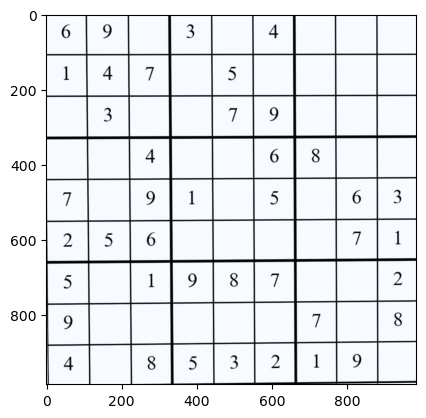

In [89]:
import recog
import recog_l2
# cropped=recog.recognize(path="./data/level_1.jpg")
clf_name="sudoku_029"
dir_path = "./data/level1/"
problems=recog_l2.recognize(path=f"./{dir_path}{clf_name}.jpg",clf=clf,scaler=scaler,n_close=1,n_open=1,mean_white_axis=0,erase_line=0)
problem=problems[0]
cropped=recog_l2.recognize(path=f"./{dir_path}{clf_name}.jpg",clf=clf,scaler=scaler,n_close=1,n_open=1,ret_img=1,mean_white_axis=0,erase_line=0)
# plt.imshow(cropped, cmap='gray')
plt.imshow(cropped)

In [90]:
problem

[[6, 7, 0, 3, 0, 1, 0, 0, 0],
 [1, 4, 7, 0, 5, 0, 0, 0, 0],
 [0, 3, 0, 0, 7, 9, 0, 0, 0],
 [0, 0, 4, 0, 0, 6, 8, 0, 0],
 [7, 0, 9, 1, 0, 5, 0, 6, 1],
 [2, 5, 6, 0, 0, 0, 0, 7, 1],
 [5, 0, 1, 9, 8, 7, 0, 0, 2],
 [9, 0, 0, 0, 0, 0, 7, 0, 8],
 [4, 0, 8, 5, 3, 2, 1, 5, 0]]

In [91]:
with open(f'./{dir_path}{clf_name}.txt', 'r') as f:
    matrix_data = [[int(num) for num in line.split()] for line in f]
for row in matrix_data:
    print(row)

[6, 9, 0, 3, 0, 4, 0, 0, 0]
[1, 4, 7, 0, 5, 0, 0, 0, 0]
[0, 3, 0, 0, 7, 9, 0, 0, 0]
[0, 0, 4, 0, 0, 6, 8, 0, 0]
[7, 0, 9, 1, 0, 5, 0, 6, 3]
[2, 5, 6, 0, 0, 0, 0, 7, 1]
[5, 0, 1, 9, 8, 7, 0, 0, 2]
[9, 0, 0, 0, 0, 0, 7, 0, 8]
[4, 0, 8, 5, 3, 2, 1, 9, 0]


In [92]:

validate=[matrix_data[i][j]==problem[i][j] for i in range(9) for j in range(9)]
proba=sum(validate)/len(validate)
zeros=np.sum(np.array(matrix_data) == 0)
nonzeros=81-zeros
failed=81-proba*81
print(proba,failed,f"failure rate: {failed/nonzeros:.2f}")
# validate


0.9506172839506173 4.0 failure rate: 0.10
